<center><h1>Online Shoppers Intention Prediction</h1></center> 

### Data Source: 
"add dataset link here"
        
### Data Description: 
The dataset includes 12,330 feature vectors representing individual sessions over a year, ensuring diversity across users and avoiding biases towards specific campaigns or periods. Of these sessions, 84.5% (10,422) did not end in shopping, while 1,908 sessions ended with a shopping event.

#### Numerical features
| Feature name | Feature description                                                 | Min. val | Max. val | SD     |
|:-------------|:--------------------------------------------------------------------|:---------|:---------|:-------|
| Admin.       | #pages visited by the visitor about account management              | 0        | 27       | 3.32   |
| Ad. duration | #seconds spent by the visitor on account management related pages	 | 0        | 3398     | 176.70 |
| Info.        | #informational pages visited by the visitor                         | 0        | 24       | 1.26   |
| Info. durat. | #seconds spent by the visitor on informational pages	             | 0        | 2549     | 140.64 |
| Prod.        | #pages visited by visitor about product related pages	             | 0        | 705      | 44.45  |
| Prod.durat.  | #seconds spent by the visitor on product related pages	             | 0        | 63,973   | 1912.3 |
| Bounce rate  | Average bounce rate value of the pages visited by the visitor	     | 0        | 0.2      | 0.04   |
| Exit rate	   | Average exit rate value of the pages visited by the visitor         | 0        | 0.2      | 0.05   |
| Page value   | Average page value of the pages visited by the visitor	             | 0        | 361      | 18.55  |
| Special day  | Closeness of the site visiting time to a special day	             | 0        | 1.0      | 0.19   |

#### Categorical features
| Feature name        | Feature description                                                      | Number of Values |
|:--------------------|:-------------------------------------------------------------------------|:-----------------|
| OperatingSystems    | Operating system of the visitor                                          | 8                |
| Browser             | Browser of the visitor                                                   | 13               |
| Region              | Geographic region from which the session has been started by the visitor | 9                |
| TrafficType         | Traffic source (e.g., banner, SMS, direct)                               | 20               |
| VisitorType         | Visitor type as “New Visitor,” “Returning Visitor,” and “Other”	         | 3                |
| Weekend             | Boolean value indicating whether the date of the visit is weekend        | 2                |
| Month               | Month value of the visit date                                            | 12               |
| Revenue             | Class label: whether the visit has been finalized with a transaction     | 2                |

### Project Goal
The primary aim of this project is to create a machine learning classification system capable of predicting an online shopper's intent (_purchase_ or _no purchase_) by utilizing the provided feature values. Our approach involves experimenting with various classification algorithms to assess their performance and select the most suitable model for the task.

### Libraries Import

In [1]:
import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

### Data Import

In [2]:
df = pd.read_csv("online_shoppers_intention.csv")

### Data Description

#### Data Header

In [3]:
df.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False


#### Data Types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Here we can see that most of our dataset columns are numerical(integers/floats) 
<br>
*Revenue* and *Weekend* are boolean type.
<br>
so, we have to transform these two columns into binary type (0 & 1). 

#### Statistical Analysis of Our Dataset

In [5]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


### Data Cleaning

#### Missing Data Points

In [6]:
print(df.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


There don't seem to be any missing values within our dataset.

#### Data Type Fix

We aim to convert the *Revenue* and *Weekend* features from their current boolean format into binary, facilitating their seamless utilization in subsequent calculations.

In [7]:
df.Revenue = df.Revenue.astype('int')
df.Weekend = df.Weekend.astype('int')

Now, let's check dataset info: 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

The transformation process has effectively converted both *Revenue* and *Weekend* features into binary representations consisting of 0s and 1s.

### EDA

#### Correlation Analysis

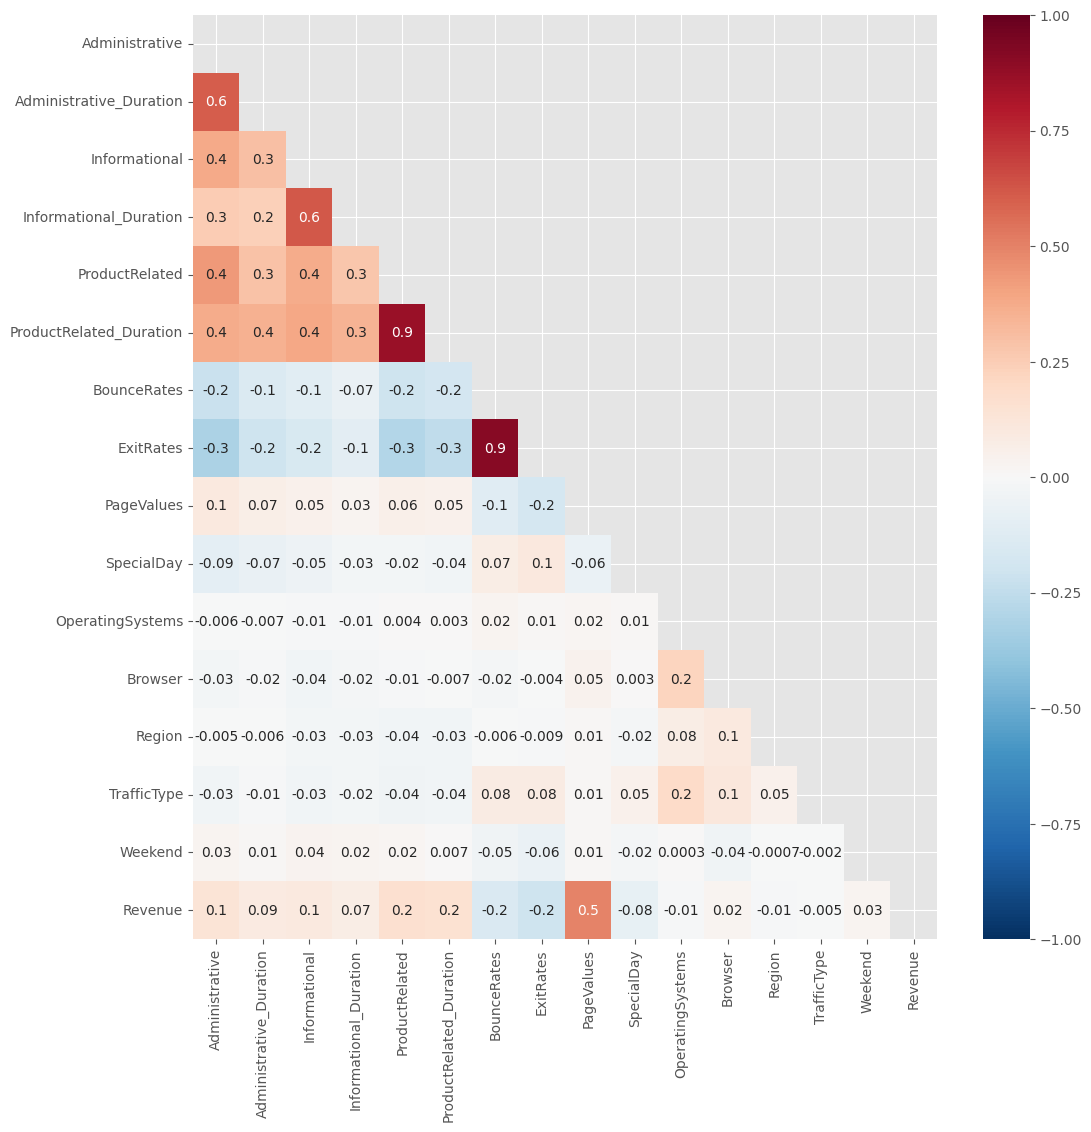

In [10]:
numeric_df = df.select_dtypes(include=['float64', 'int64','int32'])
matrix = np.triu(numeric_df.corr())
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(numeric_df.corr(), annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center= 0, mask=matrix, cmap='RdBu_r')
plt.show() 

The heatmap analysis reveals the following key observations:

- Overall, there is minimal correlation observed among the various features within our dataset.
- Notable instances of high correlation (|corr| ≥ 0.7) are evident between:
    - BounceRates & ExitRates (0.9).
    - ProductRelated & ProductRelated_Duration (0.9).
- Moderate correlations (0.3 < |corr| < 0.7) exist:
    - Among Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, and ProductRelated_Duration.
    - Additionally, a correlation exists between PageValues and Revenue.

Let's proceed to visualize the correlations among selected features.

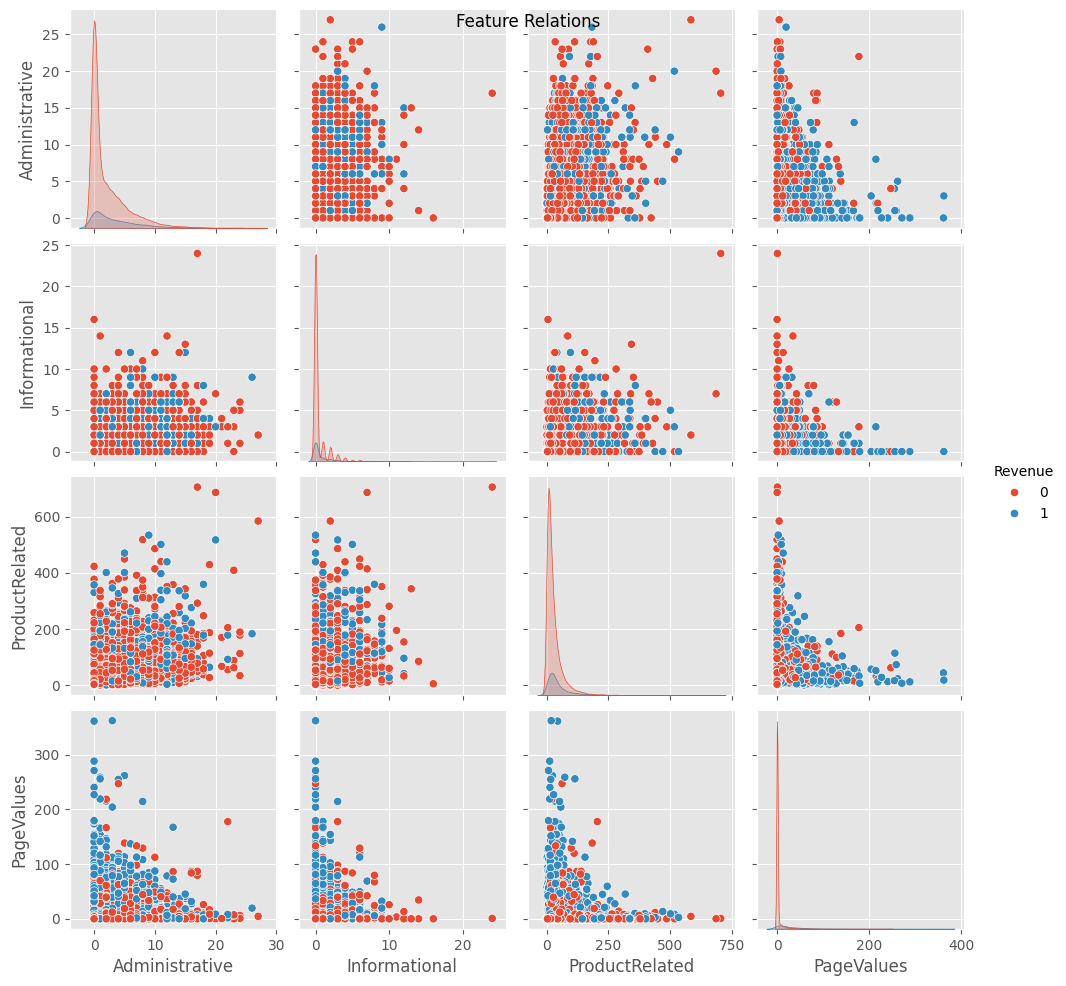

In [11]:
g1 = sns.pairplot(df[['Administrative', 'Informational', 'ProductRelated', 'PageValues', 'Revenue']], hue='Revenue')
g1.fig.suptitle('Feature Relations')
plt.show()

Based on the visulization analysis:

- There doesn't appear to be a significant correlation between *Revenue* (our target variable) and any other feature.
- Notably, there is a strong negative correlation observed between *PageValues* and the other depicted features.

#### Web Pages Analysis

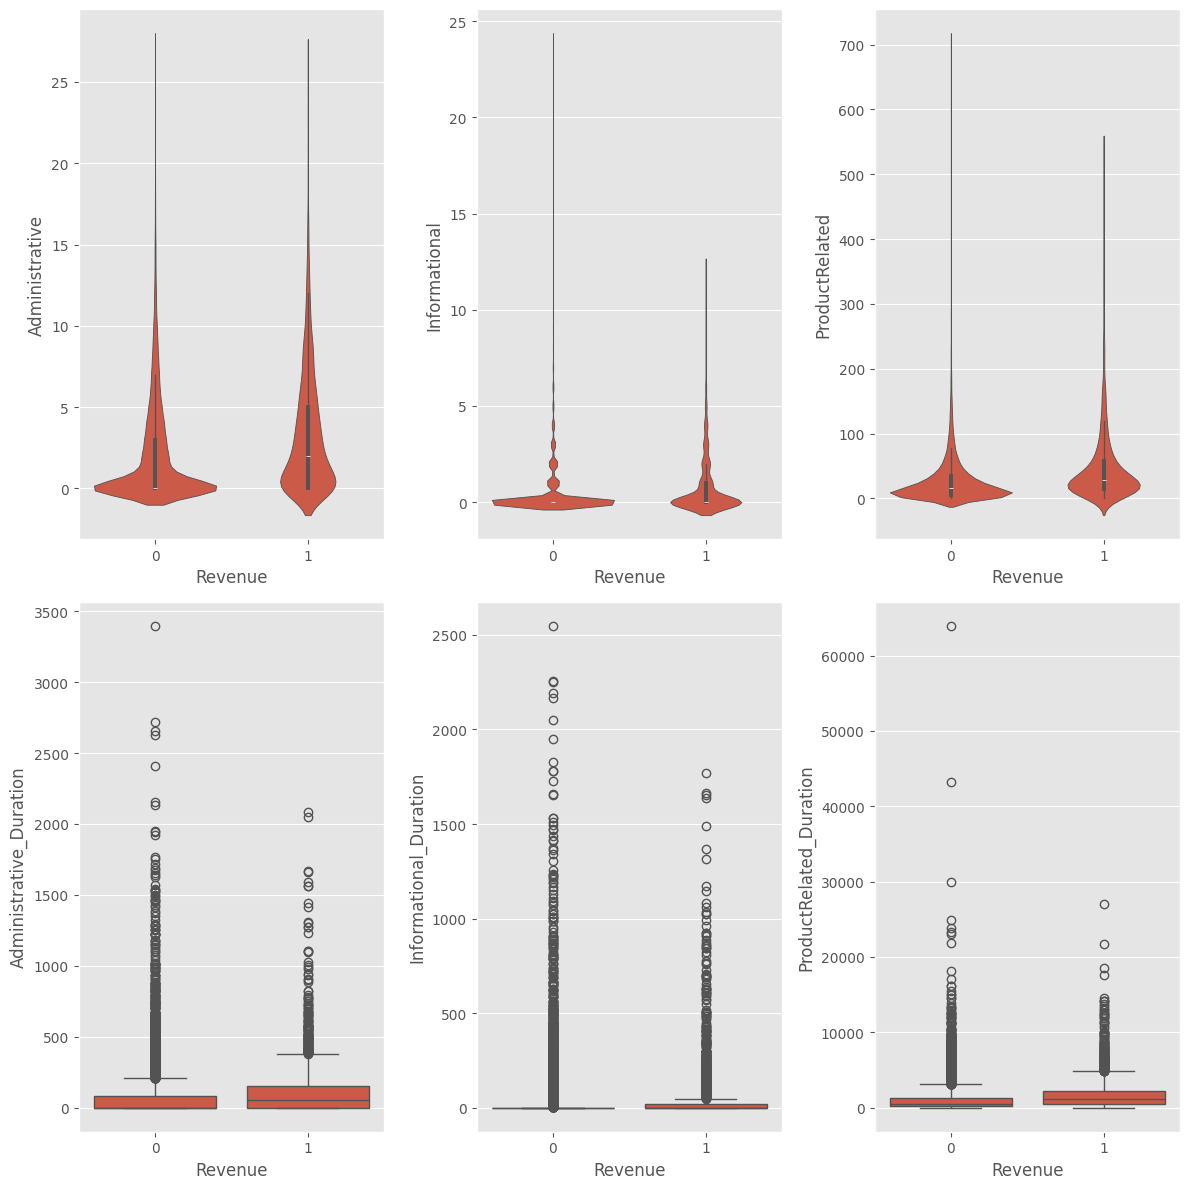

In [12]:
fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

sns.violinplot(data=df, x = 'Revenue', y = 'Administrative', ax=ax1)
sns.violinplot(data=df, x = 'Revenue', y = 'Informational', ax=ax2)
sns.violinplot(data=df, x = 'Revenue', y = 'ProductRelated', ax=ax3)
sns.boxplot(data=df, x = 'Revenue', y = 'Administrative_Duration', ax=ax4)
sns.boxplot(data=df, x = 'Revenue', y = 'Informational_Duration', ax=ax5)
sns.boxplot(data=df, x = 'Revenue', y = 'ProductRelated_Duration', ax=ax6)

plt.tight_layout()
plt.show()

From the above boxplots, we can see that:
- Typically, visitors who do not intend to make a purchase tend to browse fewer pages and spend less time on the website.
- There's a notable difference in the frequency and duration of visits between product-related pages compared to account-related or informational ones, with a considerably higher engagement observed for product-related content.
- The first three features exhibit a skewed normal distribution pattern.

#### Page Metrics Analysis

C:\Users\vicky\AppData\Local\Temp\ipykernel_26128\3819518687.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BounceRates'], bins=20, ax=ax1)
C:\Users\vicky\AppData\Local\Temp\ipykernel_26128\3819518687.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ExitRates'], bins=20, ax=ax2)


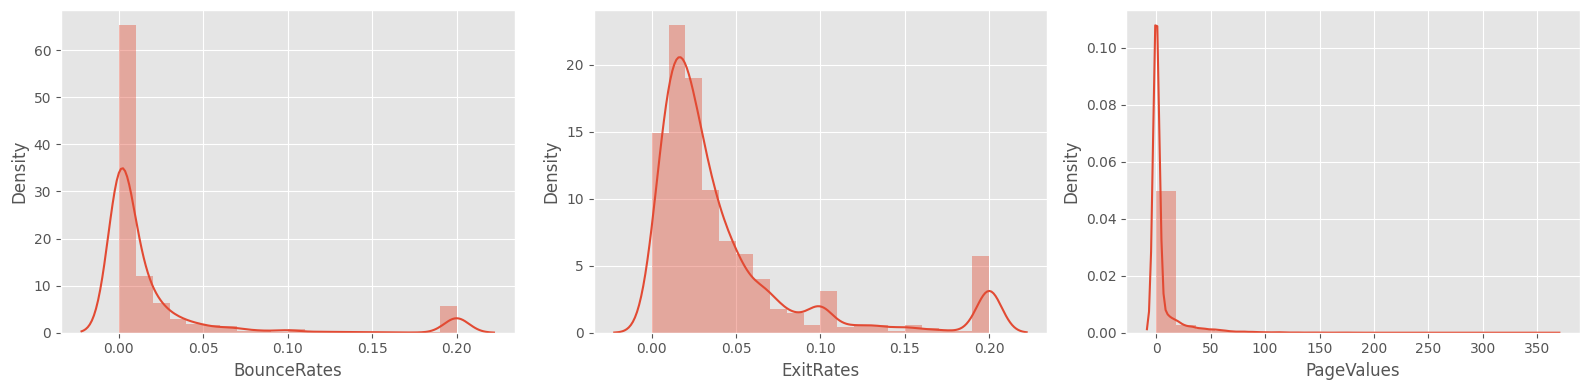

In [13]:
fig = plt.figure(figsize=(16, 4))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.distplot(df['BounceRates'], bins=20, ax=ax1)
sns.distplot(df['ExitRates'], bins=20, ax=ax2)
sns.distplot(df['PageValues'], bins=20, ax=ax3)

plt.tight_layout()
plt.show()

From the visualizations of the three Google Analytics metrics:

- *BounceRates* and *PageValues* display distributions that deviate from a normal distribution.
- All three metrics exhibit right-skewed distributions.
- The distributions of these metrics contain numerous outliers.
- On average, the bounce and exit rates for the majority of data points are low, which suggests positive engagement with the website. High rates typically indicate visitors disengaging quickly from the site.
- It's noticeable that the exit rate tends to have more higher values compared to the bounce rate, which aligns with expectations. For instance, transaction confirmation pages often contribute to an increased average exit rate.
- Bounce rate refers to the percentage of sessions where the initial page visited was also the sole page visited during that session.
- Exit rate of a page denotes the percentage of sessions that ended with that particular page being the last one visited out of all visits to that page.

#### Visitor Analysis

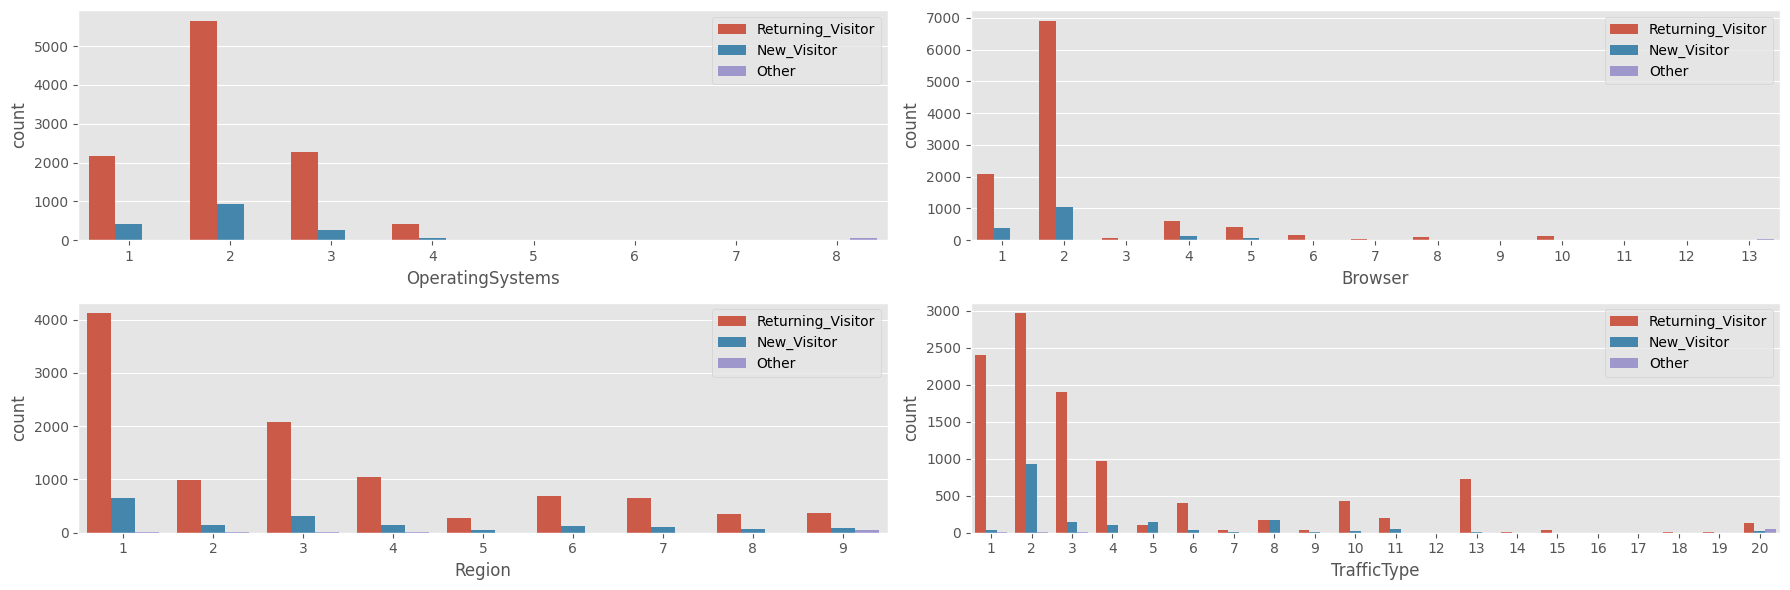

In [14]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.countplot(data=df, x='OperatingSystems', hue='VisitorType', ax=ax1)
sns.countplot(data=df, x='Browser', hue='VisitorType', ax=ax2)
sns.countplot(data=df, x='Region', hue='VisitorType', ax=ax3)
sns.countplot(data=df, x='TrafficType', hue='VisitorType', ax=ax4)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
ax4.legend(loc='upper right')
plt.tight_layout()
plt.show()

The insights from the dataset regarding operating systems, browsers, and traffic sources are as follows:

- One operating system is significantly prevalent, accounting for approximately 7,000 examples within our dataset.
- Four out of the eight operating systems have very limited representation, each contributing to fewer than 200 examples in our dataset.
- Similar trends are observed with the browsers used by visitors, with one dominant browser, three others displaying decent representation, and the remaining browsers being infrequently utilized.
- The dataset reflects a diverse regional distribution of traffic, indicating varied origins or user locations.
- Furthermore, the traffic sources exhibit significant diversity, with a few sources contributing minimally to the dataset.

#### Visit Date Analysis

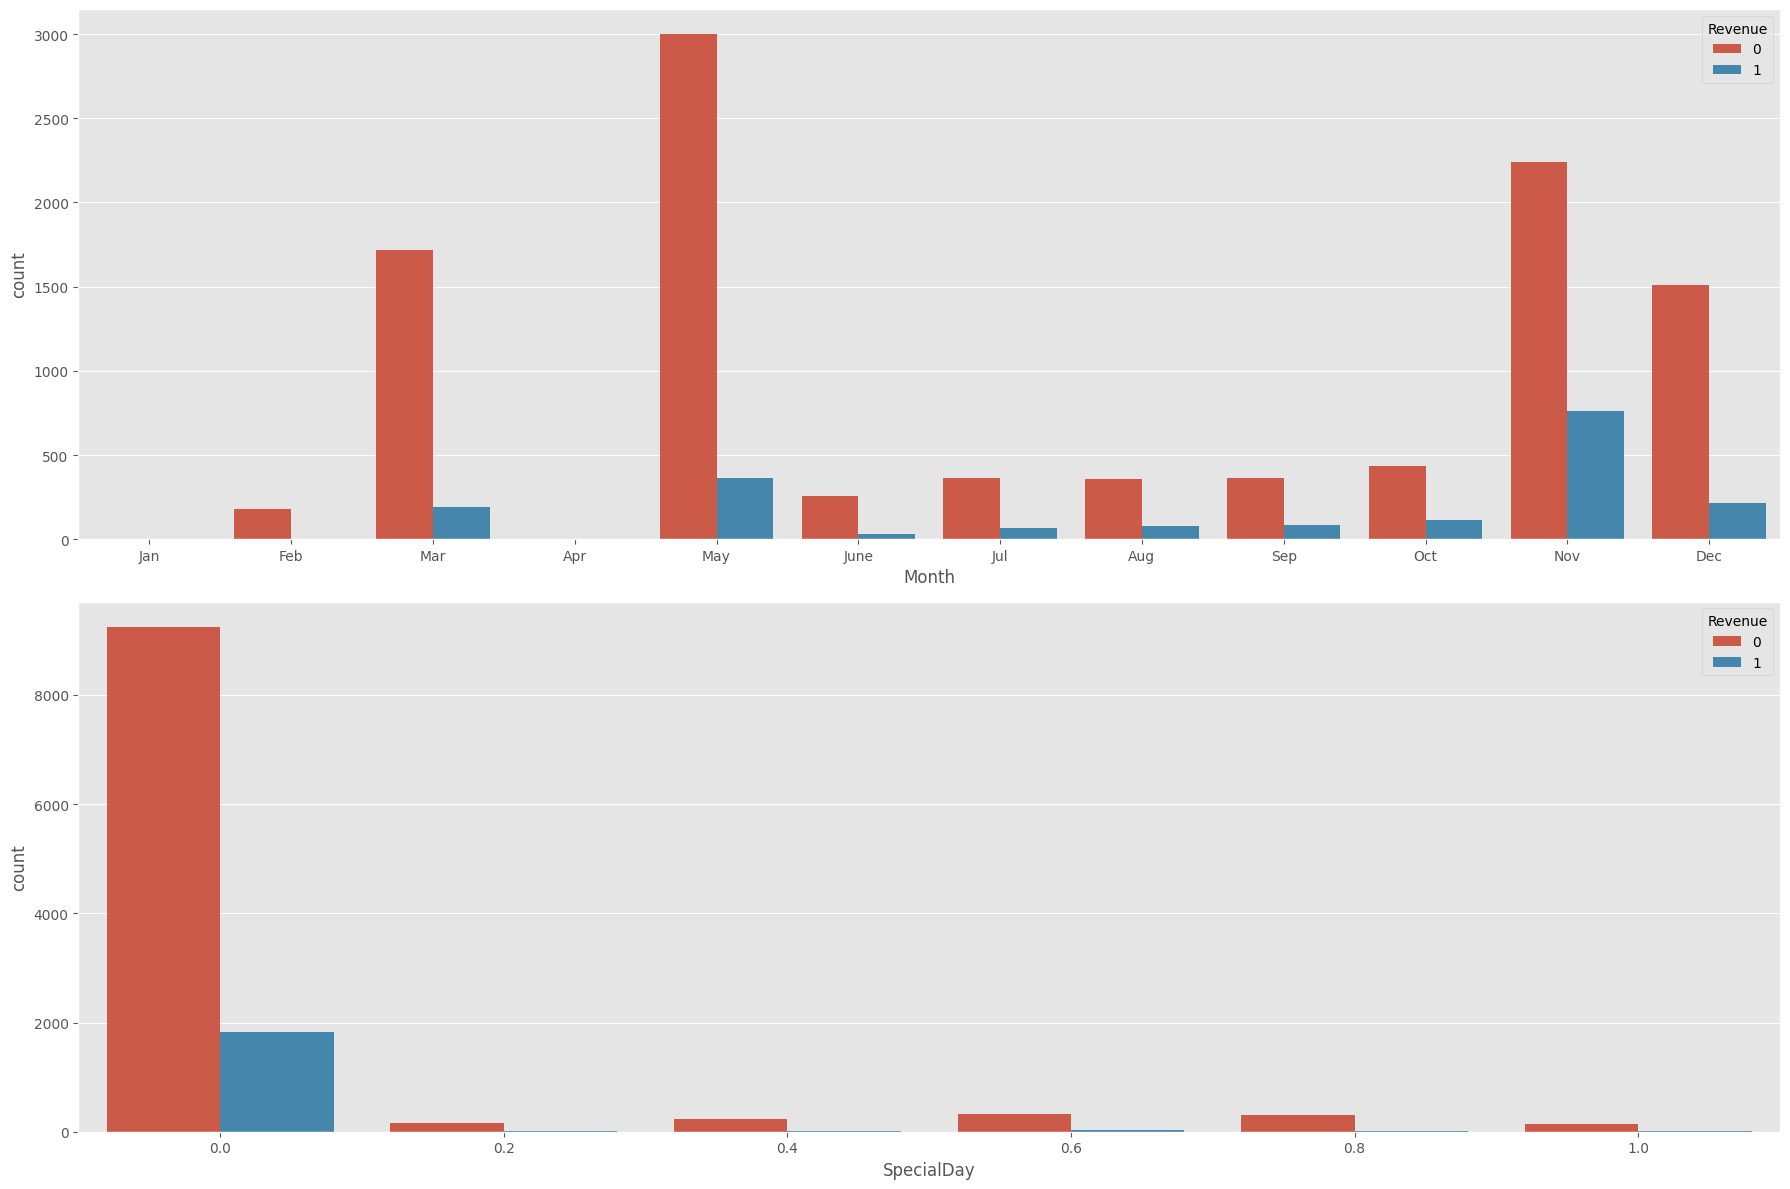

In [15]:
fig = plt.figure(figsize=(18, 12))

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

orderlist = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
sns.countplot(data=df, x='Month', hue='Revenue', ax=ax1, order=orderlist)
sns.countplot(data=df, x='SpecialDay', hue='Revenue', ax=ax2)

plt.tight_layout()
plt.show()

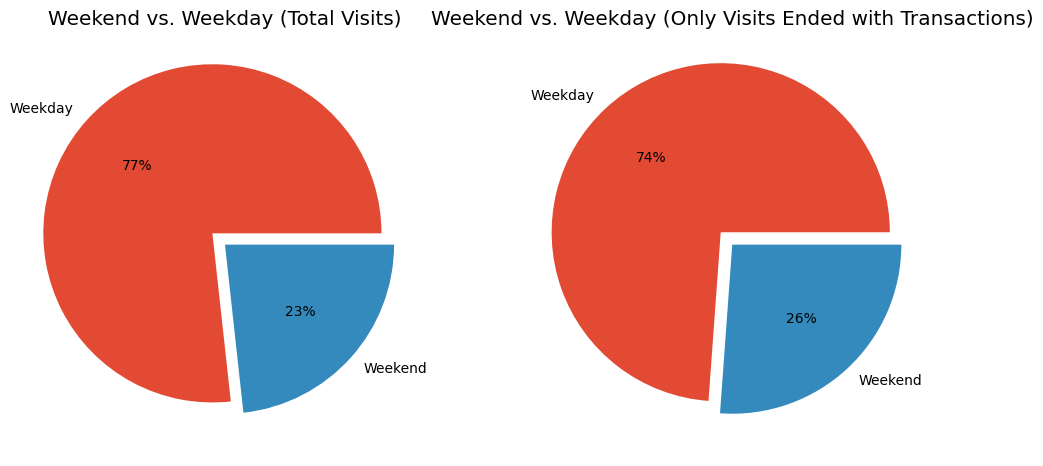

In [16]:
fig, ax = plt.subplots(1, 2,figsize=(12, 6), subplot_kw=dict(aspect="equal"))
ax[0].pie(df['Weekend'].value_counts(),explode=(0.1,0),labels=['Weekday','Weekend'], autopct='%1.0f%%')
ax[0].set_title('Weekend vs. Weekday (Total Visits)')
ax[1].pie(df[df['Revenue'] == 1]['Weekend'].value_counts(),explode=(0.1,0),labels=['Weekday','Weekend'], autopct='%1.0f%%')
ax[1].set_title('Weekend vs. Weekday (Only Visits Ended with Transactions)')
#fig.suptitle('Weekend Visits')
plt.show()

The temporal analysis of visit and transaction patterns unveils several trends:

- March and May stand out as months with notably high visitation, especially May, which records the highest visit count. However, the transaction count during these months does not align proportionally with the visit volume.
- There are no recorded visits in January or April.
- Transactions peak towards the year's end, with November displaying the highest number of confirmed transactions.
- Proximity to special days, such as Black Friday or New Year's, appears to correlate with a higher likelihood of transactions occurring.
- Most transactions indeed occur on special days, particularly when the SpecialDay value equals 0.
- Weekends don't seem to significantly influence the visit or transaction volumes; there's only a slight uptick in transactions during weekends compared to weekdays.

### Data Pre-Processing

In this step, we will prepare our data for model training by undertaking the following steps:

- Convert the *Month* and *VisitorType* columns into numerical (binary) representations.
- Divide the dataset into training, validation, and testing subsets, utilizing a split ratio of 70/15/15. Additionally, isolate the *Revenue* column to serve as our predictive labels.
- Apply feature scaling to our input data, ensuring its compatibility for training the Naive Bayes and SVM models.

#### Data Transformation

In [17]:
dff = pd.concat([df,pd.get_dummies(df['Month'], prefix='Month')], axis=1).drop(['Month'],axis=1)
dff = pd.concat([dff,pd.get_dummies(dff['VisitorType'], prefix='VisitorType')], axis=1).drop(['VisitorType'],axis=1)
print(dff.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

In [18]:
dff.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True


#### Data Split

In [19]:
y = dff['Revenue']
X = dff.drop(['Revenue'], axis=1)

In [20]:
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.3, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=101)

Now we have the following data subsets:
1. Train data (X_train) and trin labels (y_train) ==> 70%
2. Validation data (X_val) and validation labels (y_val) ==> 15%
3. Test data (X_test) and test labels (y)test) ==> 15%

#### Data Scaling

We will standardize the features within our subsets to facilitate the training, validation, and testing of models that benefit from feature scaling.

In [21]:
sc_X = StandardScaler()

Xsc_train = sc_X.fit_transform(X_train)
Xsc_val = sc_X.fit_transform(X_val)
Xsc_test = sc_X.fit_transform(X_test)

## Model Building

### Naive Bayes

We'll opt for a Gaussian Naive Bayes classifier due to the normal distribution exhibited by some of our features, despite the lack of normal distribution in other features.

In [22]:
nbm = GaussianNB()
nbm.fit(X_train,y_train)
nbm_pred = nbm.predict(X_val)

print('Gaussian Naive Bayes Performance:')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, nbm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, nbm_pred))
print('Precision       : ', metrics.precision_score(y_val, nbm_pred))
print('Recall          : ', metrics.recall_score(y_val, nbm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, nbm_pred))

Gaussian Naive Bayes Performance:
---------------------------------
Accuracy        :  0.775013520822066
F1 Score        :  0.4914425427872861
Precision       :  0.3941176470588235
Recall          :  0.6525974025974026
Confusion Matrix:
  [[1232  309]
 [ 107  201]]


The less-than-desirable performance of the Naive Bayes classifier might be attributed to the Gaussian distribution assumption, which does not accurately fit all features within our dataset. This mismatch in distribution assumptions could affect the model's effectiveness.

### KNN

For the K-Nearest Neighbor (KNN) classifier, we'll utilize the scaled version of our dataset. KNN is a non-parametric learning algorithm that doesn't rely on assumptions about the underlying data distribution. This characteristic proves beneficial, especially when dealing with datasets where many features do not adhere to a specific theoretical assumption.

In [23]:
knn = KNeighborsClassifier(n_neighbors=5,weights='uniform',leaf_size=30,p=2) #default values
knn.fit(Xsc_train,y_train)
knn_pred = knn.predict(Xsc_val)

print('K-Nearest Neighbor Initial Performance:')
print('---------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, knn_pred))
print('F1 Score        : ', metrics.f1_score(y_val, knn_pred))
print('Precision       : ', metrics.precision_score(y_val, knn_pred))
print('Recall          : ', metrics.recall_score(y_val, knn_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, knn_pred))

K-Nearest Neighbor Initial Performance:
---------------------------------------
Accuracy        :  0.8734451054624122
F1 Score        :  0.5021276595744681
Precision       :  0.7283950617283951
Recall          :  0.38311688311688313
Confusion Matrix:
  [[1497   44]
 [ 190  118]]


In comparison to Naive Bayes, the initial model of K-Nearest Neighbor (KNN) has notably improved accuracy and F1 score, although there is a decrease in recall. Next, we aim to further enhance its performance through hyper-parameter tuning using grid search.

##### KNN Tuning

We will perform hyper-parameter tuning for the K-Nearest Neighbor (KNN) model on the following parameters:

- **leaf_size:** This parameter can influence the speed of the algorithm and the memory required to store the tree.
- **n_neighbors:** It determines the number of neighbors considered in the algorithm.
- **p:** It specifies the distance metric to be used: p=1 corresponds to the Manhattan distance, and p=2 corresponds to the Euclidean distance.
- **weights:** This parameter defines the weight function used in prediction.

In [24]:
knn_param_grid = {'n_neighbors': list(range(1,30)), 
                  'leaf_size': [1,10,20,30,40,50], 
                  'p': [1,2],
                  'weights': ['uniform','distance']}
knn_grid = GridSearchCV(KNeighborsClassifier(),
                        knn_param_grid,
                        verbose=3)

In [25]:
knn_grid.fit(Xsc_train,y_train)

Fitting 5 folds for each of 696 candidates, totalling 3480 fits
[CV 1/5] END leaf_size=1, n_neighbors=1, p=1, weights=uniform;, score=0.828 total time=   0.1s
[CV 2/5] END leaf_size=1, n_neighbors=1, p=1, weights=uniform;, score=0.845 total time=   0.1s
[CV 3/5] END leaf_size=1, n_neighbors=1, p=1, weights=uniform;, score=0.849 total time=   0.0s
[CV 4/5] END leaf_size=1, n_neighbors=1, p=1, weights=uniform;, score=0.849 total time=   0.0s
[CV 5/5] END leaf_size=1, n_neighbors=1, p=1, weights=uniform;, score=0.848 total time=   0.0s
[CV 1/5] END leaf_size=1, n_neighbors=1, p=1, weights=distance;, score=0.828 total time=   0.0s
[CV 2/5] END leaf_size=1, n_neighbors=1, p=1, weights=distance;, score=0.845 total time=   0.0s
[CV 3/5] END leaf_size=1, n_neighbors=1, p=1, weights=distance;, score=0.849 total time=   0.0s
[CV 4/5] END leaf_size=1, n_neighbors=1, p=1, weights=distance;, score=0.849 total time=   0.0s
[CV 5/5] END leaf_size=1, n_neighbors=1, p=1, weights=distance;, score=0.848 

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 10, 20, 30, 40, 50],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             verbose=3)

In [26]:
knn_grid.best_params_

{'leaf_size': 1, 'n_neighbors': 8, 'p': 1, 'weights': 'distance'}

In [27]:
knn_grid.best_estimator_

KNeighborsClassifier(leaf_size=1, n_neighbors=8, p=1, weights='distance')

In [28]:
knn_grid_pred = knn_grid.predict(Xsc_val)

In [29]:
print('K-Nearest Neighbor Tuned Performance:')
print('-------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, knn_grid_pred))
print('F1 Score        : ', metrics.f1_score(y_val, knn_grid_pred))
print('Precision       : ', metrics.precision_score(y_val, knn_grid_pred))
print('Recall          : ', metrics.recall_score(y_val, knn_grid_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, knn_grid_pred))

K-Nearest Neighbor Tuned Performance:
-------------------------------------
Accuracy        :  0.8674959437533802
F1 Score        :  0.44191343963553537
Precision       :  0.7404580152671756
Recall          :  0.31493506493506496
Confusion Matrix:
  [[1507   34]
 [ 211   97]]


The performance of the K-Nearest Neighbor (KNN) model showed only a marginal improvement after the hyper-parameter tuning process.

### SVM

For the Support Vector Machine (SVM) classifier, we'll employ the scaled version of our dataset.

SVM is recognized for its ability to provide high accuracy classification and its utilization of the kernel trick to handle nonlinear input spaces. This classifier distinguishes data points using a hyperplane that maximizes the margin between classes. SVM determines the optimal hyperplane, which aids in accurately classifying new data points.

In [31]:
svm = SVC(C=1.0,kernel='rbf',degree=3,gamma='scale') #default values
svm.fit(Xsc_train,y_train)
svm_pred = svm.predict(Xsc_val)

print('SVM Initial Performance:')
print('------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, svm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, svm_pred))
print('Precision       : ', metrics.precision_score(y_val, svm_pred))
print('Recall          : ', metrics.recall_score(y_val, svm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, svm_pred))

SVM Initial Performance:
------------------------
Accuracy        :  0.8875067604110329
F1 Score        :  0.5856573705179283
Precision       :  0.7577319587628866
Recall          :  0.4772727272727273
Confusion Matrix:
  [[1494   47]
 [ 161  147]]


Compared to K-Nearest Neighbor (KNN), the initial Support Vector Machine (SVM) model demonstrated a substantial improvement across all performance metrics. The next step involves attempting to further enhance its performance through hyper-parameter tuning using grid search.

##### SVM Tuning

The hyper-parameter tuning for the Support Vector Machine (SVM) model will focus on the following parameters:

- **Kernel:** Determines the transformation applied to the dataset, enabling different function types such as linear, polynomial, and radial basis function (RBF). Polynomial and RBF kernels are effective for capturing non-linear relationships in the data, potentially leading to more accurate classifiers.
- **Regularization (C parameter):** Controls the degree of regularization. Smaller values of C create a small-margin hyperplane, while larger values of C create a larger-margin hyperplane.
- **Gamma:** Affects the model's flexibility. Lower gamma values lead to a smoother decision boundary, while higher gamma values result in more complex, over-fitted boundaries. Lower gamma considers only nearby points for boundary calculation, whereas higher gamma considers all data points in the calculation. Adjusting gamma can influence the trade-off between model complexity and generalization.

In [32]:
svm_param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [0.1,0.01,0.001,0.0001], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']} 
svm_grid = GridSearchCV(SVC(),
                        svm_param_grid,
                        refit=True,
                        verbose=3)

In [33]:
svm_grid.fit(Xsc_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.880 total time=   1.7s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.887 total time=   1.4s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.885 total time=   1.6s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.887 total time=   1.7s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.885 total time=   1.5s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.880 total time=   1.1s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.881 total time=   1.3s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.884 total time=   1.1s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.890 total time=   0.9s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.882 total time=   1.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.860 total time=   1.5s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.867 total time=   1.5s
[CV 3/5] END ......C=0.1, ga

In [2]:
svm_grid.best_params_

NameError: name 'svm_grid' is not defined

In [160]:
svm_grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [1]:
svm_grid = SVC(C=10,kernel='rbf',degree=3,gamma=0.01) #default values
svm_grid.fit(Xsc_train,y_train)

svm_grid_pred = svm_grid.predict(Xsc_val)

print('SVM Tuned Performance:')
print('----------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, svm_grid_pred))
print('F1 Score        : ', metrics.f1_score(y_val, svm_grid_pred))
print('Precision       : ', metrics.precision_score(y_val, svm_grid_pred))
print('Recall          : ', metrics.recall_score(y_val, svm_grid_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, svm_grid_pred))

NameError: name 'SVC' is not defined

The hyper-parameter tuning for the Support Vector Machine (SVM) has resulted in a noticeable enhancement in classification accuracy and F1 score.

### Logistic Regression

Logistic regression measures the relationship between the categorical dependent variable and the independent variables by estimating probabilities using a logistic/sigmoid function. 

In [174]:
lrm = LogisticRegression(C=1.0,solver='lbfgs',) #default parameters
lrm.fit(X_train,y_train)
lrm_pred = lrm.predict(X_val)

print('Logistic Regression initial Performance:')
print('----------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, lrm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, lrm_pred))
print('Precision       : ', metrics.precision_score(y_val, lrm_pred))
print('Recall          : ', metrics.recall_score(y_val, lrm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, lrm_pred))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression initial Performance:
----------------------------------------
Accuracy        :  0.8777717685235262
F1 Score        :  0.5232067510548523
Precision       :  0.7469879518072289
Recall          :  0.4025974025974026
Confusion Matrix:
  [[1499   42]
 [ 184  124]]


The default logistic regression classifier resulted in less accuracy and F1 score compared to SVM. Next we will try to tune it hyper-parameters to achieve better performance. 

##### Logistic Regression Tuning

In [176]:
lrm_param_grid = {'C': [0.01, 0.1, 1, 10, 100],  
              'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']} 
lrm_grid = GridSearchCV(LogisticRegression(),
                        lrm_param_grid,
                        refit=True,
                        verbose=3)

In [177]:
lrm_grid.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=0.01, solver=newton-cg ........................................
[CV] ............ C=0.01, solver=newton-cg, score=0.880, total=   0.6s
[CV] C=0.01, solver=newton-cg ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] ............ C=0.01, solver=newton-cg, score=0.880, total=   0.8s
[CV] C=0.01, solver=newton-cg ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV] ............ C=0.01, solver=newton-cg, score=0.878, total=   0.7s
[CV] C=0.01, solver=lbfgs ............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[CV] ................ C=0.01, solver=lbfgs, score=0.881, total=   0.3s
[CV] C=0.01, solver=lbfgs ............................................
[CV] ................ C=0.01, solver=lbfgs, score=0.885, total=   0.2s
[CV] C=0.01, solver=lbfgs ............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[CV] ................ C=0.01, solver=lbfgs, score=0.878, total=   0.2s
[CV] C=0.01, solver=sag ..............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................. C=0.01, solver=sag, score=0.851, total=   0.3s
[CV] C=0.01, solver=sag ..............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................. C=0.01, solver=sag, score=0.845, total=   0.4s
[CV] C=0.01, solver=sag ..............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................. C=0.01, solver=sag, score=0.862, total=   0.3s
[CV] C=0.01, solver=saga .............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................. C=0.01, solver=saga, score=0.846, total=   0.4s
[CV] C=0.01, solver=saga .............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................. C=0.01, solver=saga, score=0.843, total=   0.4s
[CV] C=0.01, solver=saga .............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................. C=0.01, solver=saga, score=0.852, total=   0.3s
[CV] C=0.1, solver=newton-cg .........................................
[CV] ............. C=0.1, solver=newton-cg, score=0.882, total=   0.6s
[CV] C=0.1, solver=newton-cg .........................................
[CV] ............. C=0.1, solver=newton-cg, score=0.882, total=   0.7s
[CV] C=0.1, solver=newton-cg .........................................
[CV] ............. C=0.1, solver=newton-cg, score=0.881, total=   0.7s
[CV] C=0.1, solver=lbfgs .............................................
[CV] ................. C=0.1, solver=lbfgs, score=0.878, total=   0.1s
[CV] C=0.1, solver=lbfgs .............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[CV] ................. C=0.1, solver=lbfgs, score=0.881, total=   0.2s
[CV] C=0.1, solver=lbfgs .............................................
[CV] ................. C=0.1, solver=lbfgs, score=0.880, total=   0.2s
[CV] C=0.1, solver=sag ...............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=0.1, solver=sag, score=0.851, total=   0.3s
[CV] C=0.1, solver=sag ...............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=0.1, solver=sag, score=0.845, total=   0.3s
[CV] C=0.1, solver=sag ...............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=0.1, solver=sag, score=0.862, total=   0.3s
[CV] C=0.1, solver=saga ..............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................. C=0.1, solver=saga, score=0.846, total=   0.4s
[CV] C=0.1, solver=saga ..............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................. C=0.1, solver=saga, score=0.843, total=   0.3s
[CV] C=0.1, solver=saga ..............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................. C=0.1, solver=saga, score=0.852, total=   0.4s
[CV] C=1, solver=newton-cg ...........................................
[CV] ............... C=1, solver=newton-cg, score=0.884, total=   0.9s
[CV] C=1, solver=newton-cg ...........................................
[CV] ............... C=1, solver=newton-cg, score=0.882, total=   0.8s
[CV] C=1, solver=newton-cg ...........................................
[CV] ............... C=1, solver=newton-cg, score=0.881, total=   0.8s
[CV] C=1, solver=lbfgs ...............................................
[CV] ................... C=1, solver=lbfgs, score=0.881, total=   0.1s
[CV] C=1, solver=lbfgs ...............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[CV] ................... C=1, solver=lbfgs, score=0.882, total=   0.1s
[CV] C=1, solver=lbfgs ...............................................
[CV] ................... C=1, solver=lbfgs, score=0.878, total=   0.2s
[CV] C=1, solver=sag .................................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ..................... C=1, solver=sag, score=0.851, total=   0.4s
[CV] C=1, solver=sag .................................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ..................... C=1, solver=sag, score=0.845, total=   0.3s
[CV] C=1, solver=sag .................................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ..................... C=1, solver=sag, score=0.862, total=   0.3s
[CV] C=1, solver=saga ................................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................... C=1, solver=saga, score=0.846, total=   0.4s
[CV] C=1, solver=saga ................................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................... C=1, solver=saga, score=0.843, total=   0.4s
[CV] C=1, solver=saga ................................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................... C=1, solver=saga, score=0.852, total=   0.4s
[CV] C=10, solver=newton-cg ..........................................


/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV] .............. C=10, solver=newton-cg, score=0.884, total=   1.3s
[CV] C=10, solver=newton-cg ..........................................


/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iteration

[CV] .............. C=10, solver=newton-cg, score=0.884, total=   1.2s
[CV] C=10, solver=newton-cg ..........................................
[CV] .............. C=10, solver=newton-cg, score=0.883, total=   1.2s
[CV] C=10, solver=lbfgs ..............................................
[CV] .................. C=10, solver=lbfgs, score=0.882, total=   0.2s
[CV] C=10, solver=lbfgs ..............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[CV] .................. C=10, solver=lbfgs, score=0.883, total=   0.2s
[CV] C=10, solver=lbfgs ..............................................
[CV] .................. C=10, solver=lbfgs, score=0.879, total=   0.2s
[CV] C=10, solver=sag ................................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................... C=10, solver=sag, score=0.851, total=   0.3s
[CV] C=10, solver=sag ................................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................... C=10, solver=sag, score=0.845, total=   0.3s
[CV] C=10, solver=sag ................................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................... C=10, solver=sag, score=0.862, total=   0.3s
[CV] C=10, solver=saga ...............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=10, solver=saga, score=0.846, total=   0.4s
[CV] C=10, solver=saga ...............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=10, solver=saga, score=0.843, total=   0.4s
[CV] C=10, solver=saga ...............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=10, solver=saga, score=0.852, total=   0.3s
[CV] C=100, solver=newton-cg .........................................


/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iteration

[CV] ............. C=100, solver=newton-cg, score=0.883, total=   1.3s
[CV] C=100, solver=newton-cg .........................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV] ............. C=100, solver=newton-cg, score=0.884, total=   1.2s
[CV] C=100, solver=newton-cg .........................................


/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

[CV] ............. C=100, solver=newton-cg, score=0.883, total=   1.4s
[CV] C=100, solver=lbfgs .............................................
[CV] ................. C=100, solver=lbfgs, score=0.882, total=   0.2s
[CV] C=100, solver=lbfgs .............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[CV] ................. C=100, solver=lbfgs, score=0.882, total=   0.2s
[CV] C=100, solver=lbfgs .............................................
[CV] ................. C=100, solver=lbfgs, score=0.877, total=   0.2s
[CV] C=100, solver=sag ...............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=100, solver=sag, score=0.851, total=   0.3s
[CV] C=100, solver=sag ...............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=100, solver=sag, score=0.845, total=   0.3s
[CV] C=100, solver=sag ...............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................... C=100, solver=sag, score=0.862, total=   0.3s
[CV] C=100, solver=saga ..............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................. C=100, solver=saga, score=0.846, total=   0.4s
[CV] C=100, solver=saga ..............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................. C=100, solver=saga, score=0.843, total=   0.4s
[CV] C=100, solver=saga ..............................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   27.2s finished


[CV] .................. C=100, solver=saga, score=0.852, total=   0.3s


/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iteration

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [178]:
lrm_grid.best_params_

{'C': 10, 'solver': 'newton-cg'}

In [179]:
lrm_grid.best_estimator_

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
lrm_grid = LogisticRegression(C=10,solver='newton-cg',) #default parameters
lrm_grid.fit(X_train,y_train)
lrm_grid_pred = lrm_grid.predict(X_val)

print('Logistic Regression Tuned Performance:')
print('--------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, lrm_grid_pred))
print('F1 Score        : ', metrics.f1_score(y_val, lrm_grid_pred))
print('Precision       : ', metrics.precision_score(y_val, lrm_grid_pred))
print('Recall          : ', metrics.recall_score(y_val, lrm_grid_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, lrm_grid_pred))

/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Logistic Regression Tuned Performance:
--------------------------------------
Accuracy        :  0.879394267171444
F1 Score        :  0.5285412262156448
Precision       :  0.7575757575757576
Recall          :  0.40584415584415584
Confusion Matrix:
  [[1501   40]
 [ 183  125]]


/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


Fine-tuning the hyperparameters led to a slight uptick in both accuracy and F1 score for the logistic regression classifier. However, the SVM classifier continues to outperform the logistic regression model in terms of performance.

### Random Forest

A random forest is a meta-estimator that constructs multiple decision tree classifiers using different subsets of the dataset. It employs an averaging technique to enhance predictive accuracy and mitigate overfitting. The size of the subsets is managed by the max_samples parameter, which specifies the number of samples used in each tree. By default, if bootstrap=True, the algorithm utilizes bootstrapping to create the subsets; otherwise, it employs the entire dataset for building each tree.

In [19]:
rfm = RandomForestClassifier(n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='auto',
    bootstrap=True) #default parameters
rfm.fit(X_train,y_train)
rfm_pred = rfm.predict(X_val)

print('Random Forest initial Performance:')
print('----------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, rfm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, rfm_pred))
print('Precision       : ', metrics.precision_score(y_val, rfm_pred))
print('Recall          : ', metrics.recall_score(y_val, rfm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, rfm_pred))

Random Forest initial Performance:
----------------------------------
Accuracy        :  0.8945375878853434
F1 Score        :  0.6228239845261122
Precision       :  0.7703349282296651
Recall          :  0.5227272727272727
Confusion Matrix:
  [[1493   48]
 [ 147  161]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The default random forest classifier yielded superior accuracy and F1 score compared to all other tested classifiers. Our next step involves enhancing its performance, particularly focusing on improving recall, through the tuning of its hyperparameters.

##### Random Forest Tuning

As per Scikit-Learn documentation, the crucial settings for the random forest classifier are the number of trees in the forest (n_estimators) and the number of features considered for splitting at each leaf node (max_features). We intend to adjust the following hyperparameters:

- **n_estimators:** Number of trees in the forest.
- **max_features:** Maximum number of features considered for node splitting.
- **max_depth:** Maximum number of levels within each decision tree.
- **min_samples_split:** Minimum number of data points required in a node before it can be split.
- **min_samples_leaf:** Minimum number of data points allowed in a leaf node.

Considering the numerous parameters and their respective values to be tested, we will utilize a random search technique to optimize the hyperparameters this time. Random search allows for efficient exploration of the hyperparameter space in search of the best configuration for the random forest classifier.

In [185]:
rfm_param_grid = {'n_estimators': [10,80,200,800,2000,5000], 
                  'max_features': ['sqrt', 'log2'],
                  'max_depth': [10,20,30,40,50,100],
                  'min_samples_split': [2,5,10,20],
                  'min_samples_leaf': [1,2,7,15]} 

rfm_grid = RandomizedSearchCV(RandomForestClassifier(),
                        rfm_param_grid,
                        n_iter=100,
                        n_jobs= -1)

In [186]:
rfm_grid.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs

In [187]:
rfm_grid.best_params_

{'n_estimators': 5000,
 'min_samples_split': 2,
 'min_samples_leaf': 7,
 'max_features': 'sqrt',
 'max_depth': 20}

In [188]:
rfm_grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
rfm_grid = RandomForestClassifier(n_estimators=5000,
    criterion='gini',
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=7,
    max_features='sqrt',
    bootstrap=True) #default parameters
rfm_grid.fit(X_train,y_train)
rfm_grid_pred = rfm_grid.predict(X_val)

print('Random Forest Tuned Performance:')
print('--------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, rfm_grid_pred))
print('F1 Score        : ', metrics.f1_score(y_val, rfm_grid_pred))
print('Precision       : ', metrics.precision_score(y_val, rfm_grid_pred))
print('Recall          : ', metrics.recall_score(y_val, rfm_grid_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, rfm_grid_pred))

Random Forest Tuned Performance:
--------------------------------
Accuracy        :  0.9015684153596538
F1 Score        :  0.6617100371747212
Precision       :  0.7739130434782608
Recall          :  0.577922077922078
Confusion Matrix:
  [[1489   52]
 [ 130  178]]


The fine-tuned Random Forest classifier has yielded the highest accuracy, precision, recall, and F1 score among all the models tested up to this point.

### Gradient Boost

Gradient Boosted Regression Trees represent a generalization of boosting to accommodate various differentiable loss functions. This approach constructs a predictive model by combining multiple weak prediction models into an ensemble. The primary advantage of Gradient Boosted Regression Trees is their innate ability to effectively manage mixed-type data, incorporating both numerical and categorical variables seamlessly within the modeling process.

In [21]:
gbm = GradientBoostingClassifier(loss='deviance',
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=3,
    max_features=None) #default parameters
gbm.fit(X_train,y_train)
gbm_pred = gbm.predict(X_val)

print('Gradient Boost initial Performance:')
print('-----------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, gbm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, gbm_pred))
print('Precision       : ', metrics.precision_score(y_val, gbm_pred))
print('Recall          : ', metrics.recall_score(y_val, gbm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, gbm_pred))

Gradient Boost initial Performance:
-----------------------------------
Accuracy        :  0.9053542455381287
F1 Score        :  0.6891651865008881
Precision       :  0.7607843137254902
Recall          :  0.6298701298701299
Confusion Matrix:
  [[1480   61]
 [ 114  194]]


The default classification performance of gradient boosting has exhibited superior performance compared to that of random forest. Our subsequent step involves further enhancing its performance by fine-tuning its hyperparameters.

##### Gradient Boost Tuning

We plan to adjust the following hyperparameters for the gradient boosting classifier:

- **n_estimators:** Number of trees in the forest.
- **loss:** Loss function optimized during training.
- **learning_rate:** Shrinkage factor that scales the contribution of each classifier.
- **subsample:** Fraction of samples utilized for fitting individual base learners.
- **max_features:** Maximum number of features considered for node splitting.
- **max_depth:** Maximum number of levels within each decision tree.
- **min_samples_split:** Minimum number of data points required in a node before it can be split.
- **min_samples_leaf:** Minimum number of data points allowed in a leaf node.

Given the numerous parameters and their potential values to be tested, a random search method will be employed to explore and identify the best combination of hyperparameters for the gradient boosting classifier. This approach aims to efficiently navigate the hyperparameter space and enhance the model's performance.

In [194]:
gbm_param_grid = {'n_estimators': [10,80,200,800,2000,5000], 
                  'max_features': ['sqrt', 'log2'],
                  'max_depth': [10,20,30,40,50,100],
                  'min_samples_split': [2,5,10,20],
                  'min_samples_leaf': [1,2,7,15],
                  'loss': ['deviance', 'exponential'],
                  'learning_rate':[0.01,0.1,0.5],
                  'subsample':[0.7, 0.8,0.9, 1]} 

gbm_grid = RandomizedSearchCV(GradientBoostingClassifier(),
                        gbm_param_grid,
                        n_iter=100,
                        n_jobs= -1)

In [195]:
gbm_grid.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                

In [196]:
gbm_grid.best_params_

{'subsample': 0.7,
 'n_estimators': 5000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 40,
 'loss': 'exponential',
 'learning_rate': 0.1}

In [197]:
gbm_grid.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='exponential', max_depth=40,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=5000,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [22]:
gbm_grid = GradientBoostingClassifier(loss='exponential',
    learning_rate=0.1,
    n_estimators=5000,
    subsample=0.7,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=40,
    max_features='log2') #tuned parameters
gbm_grid.fit(X_train,y_train)
gbm_grid_pred = gbm_grid.predict(X_val)

print('Gradient Boost Tuned Performance:')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, gbm_grid_pred))
print('F1 Score        : ', metrics.f1_score(y_val, gbm_grid_pred))
print('Precision       : ', metrics.precision_score(y_val, gbm_grid_pred))
print('Recall          : ', metrics.recall_score(y_val, gbm_grid_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, gbm_grid_pred))

Gradient Boost Tuned Performance:
---------------------------------
Accuracy        :  0.8950784207679827
F1 Score        :  0.6407407407407407
Precision       :  0.7456896551724138
Recall          :  0.5616883116883117
Confusion Matrix:
  [[1482   59]
 [ 135  173]]


It appears that the default configuration of Gradient Boosting yielded slightly better performance compared to the tuned version of the model.

### AdaBoost

In [199]:
abm = AdaBoostClassifier(base_estimator=None,
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME.R',
    random_state=None) #default parameters
abm.fit(X_train,y_train)
abm_pred = abm.predict(X_val)

print('AdaBoost initial Performance:')
print('-----------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, abm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, abm_pred))
print('Precision       : ', metrics.precision_score(y_val, abm_pred))
print('Recall          : ', metrics.recall_score(y_val, abm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, abm_pred))

Gradient Boost initial Performance:
-----------------------------------
Accuracy        :  0.8848025959978366
F1 Score        :  0.6148282097649187
Precision       :  0.6938775510204082
Recall          :  0.551948051948052
Confusion Matrix:
  [[1466   75]
 [ 138  170]]


AdaBoost, in its current configuration, seems to exhibit lower performance compared to Gradient Boost. We will work on enhancing its performance by fine-tuning its parameters.

##### AdaBoost Tuning

We aim to adjust the following hyperparameters for AdaBoost:

- **n_estimators:** Number of trees in the forest.
- **learning_rate:** Scaling factor that regulates the contribution of each classifier.

In [209]:
abm_param_grid = {'n_estimators': [10,80,200,800,2000,5000], 
                  'learning_rate':[0.01,0.1,0.5,1]} 

abm_grid = RandomizedSearchCV(AdaBoostClassifier(),
                        abm_param_grid)

In [210]:
abm_grid.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=None),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5, 1],
                                        'n_estimators': [10, 80, 200, 800, 2000,
                                                         5000]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [211]:
abm_grid.best_params_

{'n_estimators': 80, 'learning_rate': 0.5}

In [212]:
abm_grid.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.5,
                   n_estimators=80, random_state=None)

In [23]:
abm_grid = AdaBoostClassifier(base_estimator=None,
    n_estimators=80,
    learning_rate=0.5,
    algorithm='SAMME.R',
    random_state=None) #tuned Parameters
abm_grid.fit(X_train,y_train)
abm_grid_pred = abm_grid.predict(X_val)

print('AdaBoost Tuned Performance:')
print('---------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, abm_grid_pred))
print('F1 Score        : ', metrics.f1_score(y_val, abm_grid_pred))
print('Precision       : ', metrics.precision_score(y_val, abm_grid_pred))
print('Recall          : ', metrics.recall_score(y_val, abm_grid_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, abm_grid_pred))

AdaBoost Tuned Performance:
---------------------------
Accuracy        :  0.8885884261763115
F1 Score        :  0.624087591240876
Precision       :  0.7125
Recall          :  0.5551948051948052
Confusion Matrix:
  [[1472   69]
 [ 137  171]]


The performance of the tuned AdaBoost classifier has improved compared to the default parameter settings; however, it still lags behind the performance achieved by Gradient Boost.

### Model Building Validation-Results

Here are the classification performance measures for the 7 different classification modelss tested: 

| Classifier | Accuracy | F1-Score | Precision | Recall |
|:-----------|:---------|:---------|:----------|:-------|
|Naive Bayes |0.775     |0.491     |0.394    |0.652  |
|KNN|0.873|0.506|0.723|0.39|
|SVM|0.889|0.6|0.751|0.5|
|Logistic Regression|0.879|0.529|0.758|0.406|
|Random Forest|0.902|0.662|0.774|0.578|
|Gradient Boost|0.905|0.689|0.761|0.63|
|AdaBoost|0.889|0.624|0.713|0.555|

##### ROC Curves

Indeed, the Receiver Operating Characteristic (ROC) curve is a valuable model selection metric, particularly for binary and multi-class classification problems. It showcases the performance of a model in distinguishing between different classes based on their predicted probabilities.

The ROC curve typically plots the True Positive Rate (TPR) against the False Positive Rate (FPR). A larger area under the curve (AUC) indicates that the machine learning model excels at distinguishing between the given classes. The highest achievable AUC value is 1, signifying an ideal classification model.

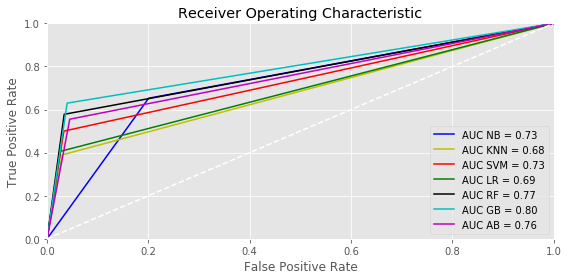

In [25]:
fpr_nb, tpr_nb, threshold_nb = metrics.roc_curve(y_val, nbm_pred)
roc_auc_nb = metrics.auc(fpr_nb, tpr_nb)
fpr_knn, tpr_knn, threshold_knn = metrics.roc_curve(y_val, knn_grid_pred)
roc_auc_knn = metrics.auc(fpr_knn, tpr_knn)
fpr_svm, tpr_svm, threshold_svm = metrics.roc_curve(y_val, svm_grid_pred)
roc_auc_svm = metrics.auc(fpr_svm, tpr_svm)
fpr_lrm, tpr_lrm, threshold_lrm = metrics.roc_curve(y_val, lrm_grid_pred)
roc_auc_lrm = metrics.auc(fpr_lrm, tpr_lrm)
fpr_rfm, tpr_rfm, threshold_rfm = metrics.roc_curve(y_val, rfm_grid_pred)
roc_auc_rfm = metrics.auc(fpr_rfm, tpr_rfm)
fpr_gbm, tpr_gbm, threshold_gbm = metrics.roc_curve(y_val, gbm_pred)
roc_auc_gbm = metrics.auc(fpr_gbm, tpr_gbm)
fpr_abm, tpr_abm, threshold_abm = metrics.roc_curve(y_val, abm_grid_pred)
roc_auc_abm = metrics.auc(fpr_abm, tpr_abm)

fig = plt.figure(figsize=(8, 4))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_nb, tpr_nb, 'b', label = 'AUC NB = %0.2f' % roc_auc_nb)
plt.plot(fpr_knn, tpr_knn, 'y', label = 'AUC KNN = %0.2f' % roc_auc_knn)
plt.plot(fpr_svm, tpr_svm, 'r', label = 'AUC SVM = %0.2f' % roc_auc_svm)
plt.plot(fpr_lrm, tpr_lrm, 'g', label = 'AUC LR = %0.2f' % roc_auc_lrm)
plt.plot(fpr_rfm, tpr_rfm, 'k', label = 'AUC RF = %0.2f' % roc_auc_rfm)
plt.plot(fpr_gbm, tpr_gbm, 'c', label = 'AUC GB = %0.2f' % roc_auc_gbm)
plt.plot(fpr_abm, tpr_abm, 'm', label = 'AUC AB = %0.2f' % roc_auc_abm)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'w--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tight_layout()
plt.show()

It's evident from the comprehensive analysis of all calculated classification metrics that the **Gradient Boosting** classifier has demonstrated the highest performance among all models tested. Therefore, we'll proceed by selecting the Gradient Boosting classifier for further use or deployment, considering its superior performance.

### Best Model Further Tuning 

Here we will experment manually tuning some of Gradient Boosting's hyper-parameters, to see if we can improve its classification performance further more. 

Not all the tests are going to be shown below, we will only show the ones that improved GB's classification performance, yet here is a list of the tests we have tried, by changing only one parameter value at a time: 

|Parameter Tested|Value Tested|Effect on Classification Performance|
|:---------------|:-----------|:-----------------------------------|
|n-estimators | 10 | way lower
|n-estimators | 50 | slightly lower
|n-estimators | 131 |  **better**
|n-estimators | 500 |  lower
|n-estimators | 2000 |  lower
|Learning_rate | 0.9  | lower
|Learning_rate | 0.02 | lower
|Learning_rate | 0.2 | slightly lower
|Learning_rate | 0.08 | slightly lower
|loss | 'exponential' | slightly lower
|subsample | 0.1 | lower
|subsample | 0.8 | slightly lower
|min_samples_split | 5 | slightly lower
|min_samples_split | 19 | slightly lower
|min_samples_split | 49 | slightly lower
|min_samples_leaf | 5 | lower
|min_samples_leaf | 19 | slightly lower
|min_samples_leaf | 49 | slightly lower
|max_depth | 1 | lower 
|max_depth | 7 | slightly lower 
|max_depth | 27 | slightly lower 
|max_depth | 47 | lower 
|max_features | 3 | slightly lower 
|max_features | 15 | slightly lower 

From those tests, we will change the number of estimators in our GB model from 100 to 131. The new GB model's performance on the validation set is shown below. 

In [103]:
gbm2 = GradientBoostingClassifier(loss='deviance',
    learning_rate=0.1,
    n_estimators=131,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=3,
    max_features=None) #default parameters
gbm2.fit(X_train,y_train)
gbm2_pred = gbm2.predict(X_val)

print('Gradient Boost Performance test :')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, gbm2_pred))
print('F1 Score        : ', metrics.f1_score(y_val, gbm2_pred))
print('Precision       : ', metrics.precision_score(y_val, gbm2_pred))
print('Recall          : ', metrics.recall_score(y_val, gbm2_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, gbm2_pred))

Gradient Boost Performance test :
---------------------------------
Accuracy        :  0.9069767441860465
F1 Score        :  0.6950354609929078
Precision       :  0.765625
Recall          :  0.6363636363636364
Confusion Matrix:
  [[1481   60]
 [ 112  196]]


We can create a visualization to illustrate how our top-performing Gradient Boosting (GB) classifier assesses the significance of various features within the dataset.

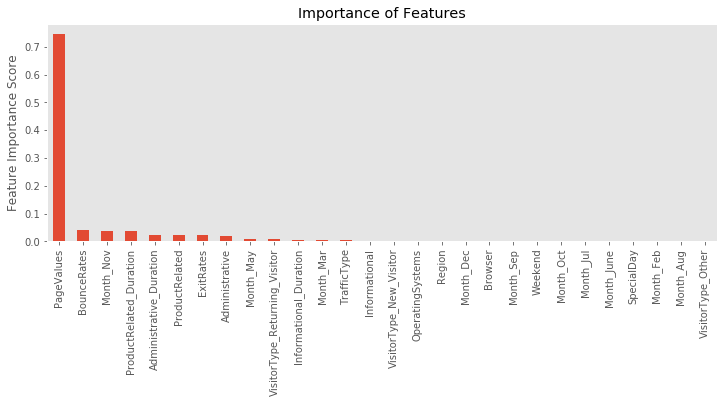

In [102]:
feat_imp = pd.Series(gbm2.feature_importances_, list(X_train)).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 4))
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
plt.grid()
plt.show()

As anticipated, *PageValues* emerges as the most crucial feature in our dataset, given its strong correlation with our target variable (*Revenue*). Overall, this depiction of feature importance aligns with our prior correlation analysis of the dataset.

### Measuring True Performance 

To accurately assess the classification model's true performance, it's essential to evaluate its efficacy on our untouched testing dataset, which hasn't been utilized in the modeling process thus far.

In [105]:
gb = GradientBoostingClassifier(loss='deviance',
    learning_rate=0.1,
    n_estimators=131,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=3,
    max_features=None) #final parameters
gb.fit(X_train,y_train)
gb_pred = gb.predict(X_test)

print('Gradient Boost: Final  ClassificationPerformance test :')
print('-------------------------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test, gb_pred))
print('F1 Score        : ', metrics.f1_score(y_test, gb_pred))
print('Precision       : ', metrics.precision_score(y_test, gb_pred))
print('Recall          : ', metrics.recall_score(y_test, gb_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_test, gb_pred))
print(classification_report(y_test, gb_pred, target_names=['Rev=0', 'Rev=1']))

Gradient Boost: Final  ClassificationPerformance test :
-------------------------------------------------------
Accuracy        :  0.9086486486486487
F1 Score        :  0.6572008113590264
Precision       :  0.7012987012987013
Recall          :  0.6183206106870229
Confusion Matrix:
  [[1519   69]
 [ 100  162]]
              precision    recall  f1-score   support

       Rev=0       0.94      0.96      0.95      1588
       Rev=1       0.70      0.62      0.66       262

    accuracy                           0.91      1850
   macro avg       0.82      0.79      0.80      1850
weighted avg       0.90      0.91      0.91      1850



### Conclusion

In this project, the *Online Shoppers Intention* dataset was employed to develop classification models aimed at predicting website visitors likely to make a purchase. Seven distinct learning classifiers (Naive Bayes, KNN, SVM, Logistic Regression, Random Forest, Gradient Boosting, and Adaboost) were tested and fine-tuned. The best classification performance was achieved using the Gradient Boost classifier, followed by Random Forest and then Adaboost.

The top classification performance metrics obtained are as follows:

- Accuracy: 91%
- F1 Score: 0.66

It's important to note that a significant disparity in classification performance exists between the two classes due to the imbalanced nature of the dataset. Approximately 85% of data points belong to one class, while less than 15% belong to the other.

For **future work**, it's advisable to explore various techniques aimed at addressing the challenges posed by imbalanced classes within the dataset. This could involve employing strategies to mitigate the impact of class imbalance on model performance.